In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

In [7]:
df = pd.read_csv('bank.csv')

In [8]:
## process categorical values

In [9]:
## convert result column - deposit to 0/1
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])

In [10]:
## deal with categorical data type
cat_col = ['job','marital','education','default','housing','loan','contact','day','month','poutcome']
df_matrix = df.copy()
for col in cat_col:
    df_cat = df[col]
    df_cat_dummy = pd.get_dummies(df_cat,drop_first=True, prefix=col)
    df_matrix.drop(col,axis=1,inplace=True)
    df_matrix = pd.concat([df_matrix,df_cat_dummy],axis=1)
    

In [11]:
from sklearn.preprocessing import MinMaxScaler
num_col = ['age','balance','duration','pdays','previous','campaign']

for col in num_col:
    df_col = df[col]
    df_matrix[col] = (df_col-df_col.min())/(df_col.max()-df_col.min())



In [12]:
df_Y = df_matrix['deposit']
df_X = df_matrix.drop('deposit',axis = 1)

In [14]:
# prepare training and test 
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.33, random_state=42)

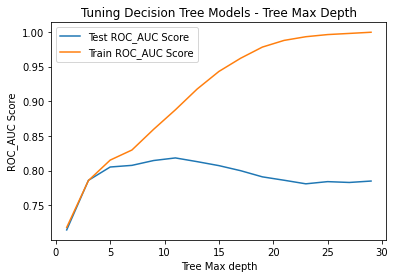

In [74]:
# Decision Tree
train_performance = []
test_performance = []
max_depth_list = list(range(1,30,2))
for n in max_depth_list:
    clf = DecisionTreeClassifier(max_depth=n, random_state=10)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_performance.append(roc_auc_score(y_train,y_pred_train))
    test_performance.append(roc_auc_score(y_test,y_pred_test))

plt.plot(max_depth_list,test_performance,label = "Test ROC_AUC Score")
plt.plot(max_depth_list,train_performance,label = "Train ROC_AUC Score")
plt.ylabel('ROC_AUC Score')
plt.xlabel('Tree Max depth')
plt.title('Tuning Decision Tree Models - Tree Max Depth')
plt.legend(loc='best')
plt.show()

In [101]:
min_leaf_list = np.linspace(round(0.0001*len(X_train)), round(0.05*len(X_train)),20).round().astype('int')

In [102]:
min_leaf_list

array([  1,  21,  40,  60,  80,  99, 119, 138, 158, 178, 197, 217, 237,
       256, 276, 295, 315, 335, 354, 374])

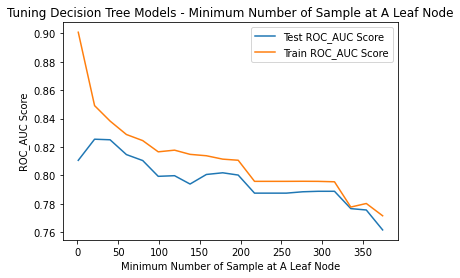

In [100]:
train_performance = []
test_performance = []
min_leaf_list = np.linspace(round(0.0001*len(X_train)), round(0.05*len(X_train)),20).round().astype('int')
for n in min_leaf_list:
    clf = DecisionTreeClassifier(max_depth=12, random_state=10, min_samples_leaf=n)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_performance.append(roc_auc_score(y_train,y_pred_train))
    test_performance.append(roc_auc_score(y_test,y_pred_test))

plt.plot(min_leaf_list,test_performance,label = "Test ROC_AUC Score")
plt.plot(min_leaf_list,train_performance,label = "Train ROC_AUC Score")
plt.ylabel('ROC_AUC Score')
plt.xlabel('Minimum Number of Sample at A Leaf Node')
plt.title('Tuning Decision Tree Models - Minimum Number of Sample at A Leaf Node')
plt.legend(loc='best')
plt.show()

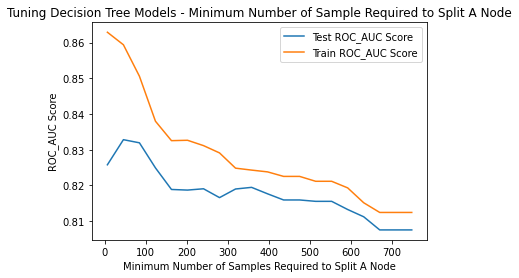

In [15]:
train_performance = []
test_performance = []
min_sample_list =  np.linspace(round(0.001*len(X_train)), round(0.1*len(X_train)),20).round().astype('int')
for n in min_sample_list:
    clf = DecisionTreeClassifier(max_depth=12, min_samples_leaf=10, random_state=10, min_samples_split=n)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_performance.append(roc_auc_score(y_train,y_pred_train))
    test_performance.append(roc_auc_score(y_test,y_pred_test))

plt.plot(min_sample_list,test_performance,label = "Test ROC_AUC Score")
plt.plot(min_sample_list,train_performance,label = "Train ROC_AUC Score")
plt.ylabel('ROC_AUC Score')
plt.xlabel('Minimum Number of Samples Required to Split A Node')
plt.title('Tuning Decision Tree Models - Minimum Number of Sample Required to Split A Node')
plt.legend(loc='best')
plt.show()

(0.7, 1.0)

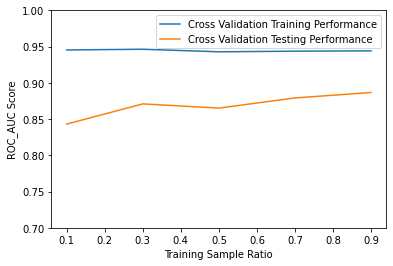

In [18]:
train_ratio = [0.1,0.3,0.5,0.7,0.9]
cv_train_scores_mean = []
cv_test_scores_mean = []

real_test_score = []
for i in train_ratio:
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=1-i, random_state=42)
    clf = DecisionTreeClassifier(max_depth=12, min_samples_leaf=10, random_state=10, min_samples_split=20)
    cv = cross_validate(clf,X_train,y_train,cv=5, scoring='roc_auc',n_jobs=-1, return_train_score=True)
    cv_train_scores_mean.append(np.mean(cv['train_score']))
    cv_test_scores_mean.append(np.mean(cv['test_score']))
plt.plot(train_ratio,cv_train_scores_mean,label='Cross Validation Training Performance')
plt.plot(train_ratio,cv_test_scores_mean,label='Cross Validation Testing Performance')
plt.legend(loc='best')
plt.xlabel('Training Sample Ratio')
plt.ylabel('ROC_AUC Score')
plt.ylim(0.7, 1.0)

In [110]:
train_ratio

array([0.95      , 0.85555556, 0.76111111, 0.66666667, 0.57222222,
       0.47777778, 0.38333333, 0.28888889, 0.19444444, 0.1       ])

In [119]:
loan_df = pd.read_csv('Training_Data.csv')

In [120]:
loan_df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [124]:
loan_df['Risk_Flag'].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [126]:
## deal with categorical data type
cat_col = ['Married/Single','House_Ownership','Car_Ownership','Profession','STATE']
df_matrix = loan_df['Risk_Flag']
for col in cat_col:
    df_cat = loan_df[col]
    df_cat_dummy = pd.get_dummies(df_cat,drop_first=True, prefix=col)
    df_matrix = pd.concat([df_matrix,df_cat_dummy],axis=1)


In [128]:
num_col = ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']
for col in num_col:
    df_col = loan_df[col]
    df_matrix[col] = (df_col-df_col.min())/(df_col.max()-df_col.min())


In [137]:
len(df_matrix)

252000

In [134]:
df_Y = df_matrix['Risk_Flag']
df_X = df_matrix.drop('Risk_Flag',axis = 1)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.33, stratify=df_Y, random_state=42)

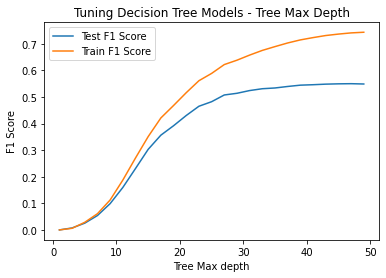

In [153]:
train_performance = []
test_performance = []
max_depth_list = list(range(1,50,2))
for n in max_depth_list:
    clf = DecisionTreeClassifier(max_depth=n, random_state=10)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_performance.append(f1_score(y_train,y_pred_train))
    test_performance.append(f1_score(y_test,y_pred_test))

plt.plot(max_depth_list,test_performance,label = "Test F1 Score")
plt.plot(max_depth_list,train_performance,label = "Train F1 Score")
plt.ylabel('F1 Score')
plt.xlabel('Tree Max depth')
plt.title('Tuning Decision Tree Models - Tree Max Depth')
plt.legend(loc='best')
plt.show()

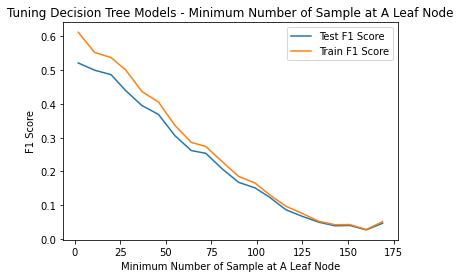

In [154]:
train_performance = []
test_performance = []
min_leaf_list = np.linspace(round(0.00001*len(X_train)), round(0.001*len(X_train)),20).round().astype('int')
for n in min_leaf_list:
    clf = DecisionTreeClassifier(max_depth=30, random_state=10, min_samples_leaf=n)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_performance.append(f1_score(y_train,y_pred_train))
    test_performance.append(f1_score(y_test,y_pred_test))

plt.plot(min_leaf_list,test_performance,label = "Test F1 Score")
plt.plot(min_leaf_list,train_performance,label = "Train F1 Score")
plt.ylabel('F1 Score')
plt.xlabel('Minimum Number of Sample at A Leaf Node')
plt.title('Tuning Decision Tree Models - Minimum Number of Sample at A Leaf Node')
plt.legend(loc='best')
plt.show()

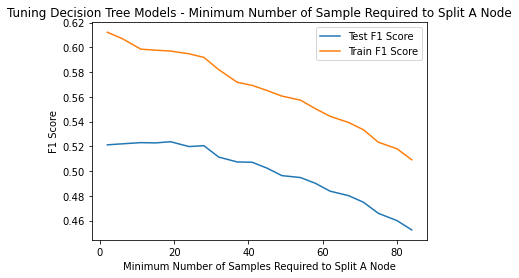

In [155]:
train_performance = []
test_performance = []
min_sample_list =  np.linspace(round(0.00001*len(X_train)), round(0.0005*len(X_train)),20).round().astype('int')
for n in min_sample_list:
    clf = DecisionTreeClassifier(max_depth=30, min_samples_leaf=2, random_state=10, min_samples_split=n)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_performance.append(f1_score(y_train,y_pred_train))
    test_performance.append(f1_score(y_test,y_pred_test))

plt.plot(min_sample_list,test_performance,label = "Test F1 Score")
plt.plot(min_sample_list,train_performance,label = "Train F1 Score")
plt.ylabel('F1 Score')
plt.xlabel('Minimum Number of Samples Required to Split A Node')
plt.title('Tuning Decision Tree Models - Minimum Number of Sample Required to Split A Node')
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'F1 Score')

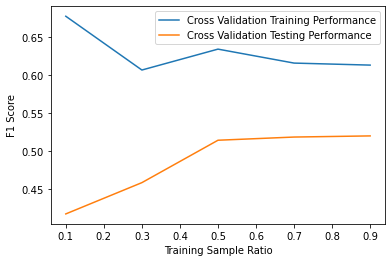

In [156]:
train_ratio = [0.1,0.3,0.5,0.7,0.9]
cv_train_scores_mean = []
cv_test_scores_mean = []

real_test_score = []
for i in train_ratio:
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=1-i, random_state=42)
    clf = DecisionTreeClassifier(max_depth=30, min_samples_leaf=2, random_state=10, min_samples_split=2)
    cv = cross_validate(clf,X_train,y_train, cv=10, scoring='f1',n_jobs=-1, return_train_score=True)
    cv_train_scores_mean.append(np.mean(cv['train_score']))
    cv_test_scores_mean.append(np.mean(cv['test_score']))
plt.plot(train_ratio,cv_train_scores_mean,label='Cross Validation Training Performance')
plt.plot(train_ratio,cv_test_scores_mean,label='Cross Validation Testing Performance')
plt.legend(loc='best')
plt.xlabel('Training Sample Ratio')
plt.ylabel('F1 Score')